In [138]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [137]:
!pip install scipy

In [27]:
set3 = cm.get_cmap("Set3", 2)
set3(1), set3(0)

((1.0, 0.9294117647058824, 0.43529411764705883, 1.0),
 (0.5529411764705883, 0.8274509803921568, 0.7803921568627451, 1.0))

In [115]:
my_cmap = ListedColormap([
    [1.0, 0.9294117647058824, 0.43529411764705883, 0.3],  # 0
    [0.1529411764705883, 0.5274509803921568, 0.3803921568627451, 1.0],  # 1
], name="facemasks")


## Face masks

In [90]:
face1 = np.array([
    [1,1,1,1,0,0,0,0,1,1,1,1],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,1,1,0,0,0,0,1,1,1,1],
    [1,1,1,1,0,0,0,0,1,1,1,1],
    np.repeat(0, 12),
    [0,0,0,0,0,1,1,0,0,0,0,0],
    [0,0,0,0,1,1,1,1,0,0,0,0],
    np.repeat(0, 12),
    np.repeat(0, 12),
    [0,0,0,0,1,0,0,1,0,0,0,0],
    [0,0,0,0,1,1,1,1,0,0,0,0],
    np.repeat(0, 12)
])

face2 = np.array([
    [0,0,0,0,0,0,0,0,1,1,1,1],
    [1,1,1,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,1,1,1],
    [1,1,1,1,0,0,0,0,1,1,1,1],
    [1,1,1,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,1,0,0,0,0,0],
    [0,0,0,0,1,1,1,1,0,0,0,0],
    np.repeat(0, 12),
    np.repeat(0, 12),
    [0,0,0,0,1,0,0,1,0,0,0,0],
    [0,0,0,0,1,1,1,1,0,0,0,0],
    np.repeat(0, 12)
])

In [134]:
def plot_img(img, ax=None):
    if ax is None:
        plt.figure()
    
    ax = plt.gca() if ax is None else ax
    ax.imshow(img, cmap=my_cmap, interpolation='none', vmin=0, vmax=1, aspect='equal')
    x_min, x_max = 0, img.shape[1]
    y_min, y_max = 0, img.shape[1]
    
    ax.set_xticks(np.arange(0, x_max, 1))
    ax.set_yticks(np.arange(0, y_max, 1))
    ax.set_xticklabels(np.arange(1, x_max+1, 1))
    ax.set_yticklabels(np.arange(1, y_max+1, 1))
    
    # Minor ticks
    ax.set_xticks(np.arange(-.5, x_max, 1), minor=True)
    ax.set_yticks(np.arange(-.5, y_max, 1), minor=True)
    
    # Gridlines based on minor ticks
    ax.grid(which='minor', color='k', linestyle='-', linewidth=0.5)

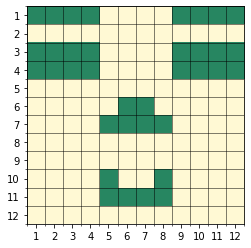

In [135]:
plot_img(face1)

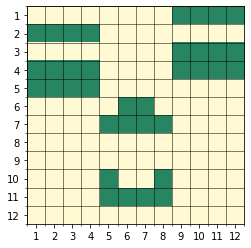

In [123]:
plot_img(face2)

## Basic Filter Layer 1

In [345]:
T = np.array([
    [1, 1],
    [0, 0]
])

Q = np.array([
    [1, 1],
    [1, 1]
])

L = np.array([
    [0, 0],
    [1, 0]
])

R = np.array([
    [0, 0],
    [0, 1]
])

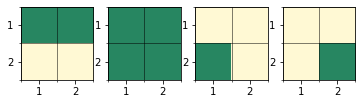

In [346]:
fig, ax = plt.subplots(1, 4)

for i, filter_ in enumerate([T,Q,L,R]):
    plot_img(filter_, ax[i])

## Calculate Filter Map for Layer 1

In [308]:
def convolve2D(input_, filter_):
    filter_size = filter_.shape[0]
    filter_map_size = input_.shape[0] - filter_size + 1
    filter_map = np.zeros((filter_map_size, filter_map_size))
    
    for i in range(filter_map_size):
        for j in range(filter_map_size):
            sub_img = input_[i : (i + filter_size), j : (j + filter_size)]
            
            actual_filter = np.copy(filter_)
            actual_filter[filter_ == -1] = sub_img[filter_ == -1]
            filter_result = (sub_img == actual_filter).all()
            filter_map[i,j] = filter_result
            
    return filter_map           

In [347]:
T_map = convolve2D(face2, T)

(None, None)

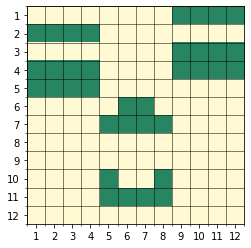

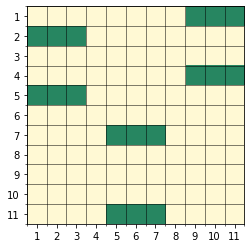

In [348]:
plot_img(face2), plot_img(T_map)

## Apply Max Pooling

In [349]:
def max_pooling(filter_map, size=2):
    pool_size = int(np.ceil(filter_map.shape[0] / size))
    pool = np.zeros((pool_size, pool_size))
    
    for i in range(pool_size):
        for j in range(pool_size):
            sub_img = filter_map[(i * size): (i * size + size), (j * size) : (j * size + size)]
            pool_result = (sub_img == 1).any()
            pool[i,j] = pool_result
            
    return pool
    

In [350]:
T_pool = max_pooling(T_map)

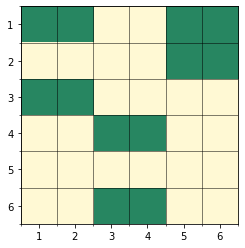

In [351]:
plot_img(T_pool)

In [352]:
Q_pool = max_pooling(convolve2D(face2, Q))
L_pool = max_pooling(convolve2D(face2, L))
R_pool = max_pooling(convolve2D(face2, R))

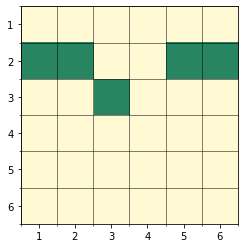

In [353]:
plot_img(Q_pool)

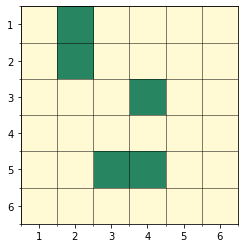

In [354]:
plot_img(L_pool)

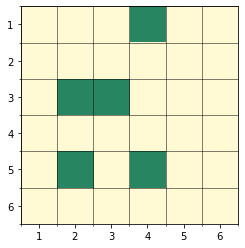

In [355]:
plot_img(R_pool)

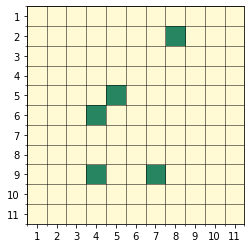

In [357]:
R_map = convolve2D(face2, R)
plot_img(R_map)

In [318]:
layer_one_output = np.array([T_pool, Q_pool, L_pool, R_pool])

In [319]:
layer_one_output

array([[[1., 1., 0., 0., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 1., 1.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]])

In [320]:
layer_one_output.shape

(4, 6, 6)

## Filter Layer 2

In [358]:
E = np.array([
    [  # T
        [1, 1],
        [-1, -1]
    ],
    [  # Q
        [-1, -1],
        [1, 1]
    ],
    [  # L
        [-1, -1],
        [-1, -1]
    ],
    [  # R
        [-1, -1],
        [-1, -1]
    ]
])

N = np.array([
    [  # T
        [-1, -1],
        [1, 1]
    ],
    [  # Q
        [-1, -1],
        [-1, -1]
    ],
    [  # L
        [-1, 1],
        [-1, -1]
    ],
    [  # R
        [1, -1],
        [-1, -1]
    ]
])

M = np.array([
    [  # T
        [-1, -1],
        [1, 1]
    ],
    [  # Q
        [-1, -1],
        [-1, -1]
    ],
    [  # L
        [1, -1],
        [-1, -1]
    ],
    [  # R
        [-1, 1],
        [-1, -1]
    ]
])

## Calculate Filter Map for Layer 2

In [333]:
def convolve3D(input_, filter_):
    channels = input_.shape[0]
    maps = []
    
    for channel in range(channels):
        maps.append(convolve2D(input_[channel], filter_[channel]))
        
    maps = np.array(maps)
    
    return maps.all(axis=0)

In [360]:
E_map = convolve3D(layer_one_output, E)

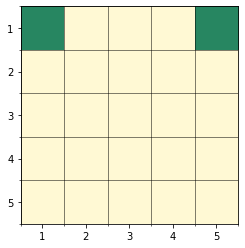

In [361]:
plot_img(E_map)

In [362]:
E_pool = max_pooling(E_map)

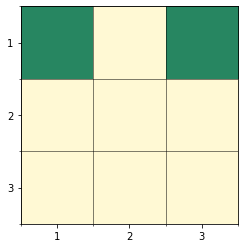

In [363]:
plot_img(E_pool)

In [364]:
N_pool = max_pooling(convolve3D(layer_one_output, N))
M_pool = max_pooling(convolve3D(layer_one_output, M))

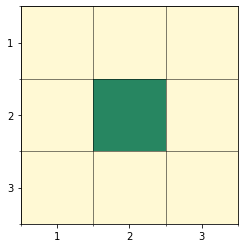

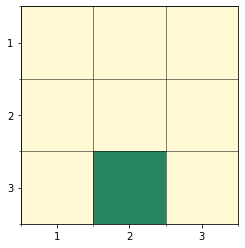

In [365]:
plot_img(N_pool)
plot_img(M_pool)

In [368]:
layer_two_output = np.array([E_pool, N_pool, M_pool])

In [369]:
layer_two_output

array([[[1., 0., 1.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 1., 0.]]])

## Filter Layer 3

In [371]:
F = np.array([
    [
        [1, -1, 1],
        [-1, -1, -1],
        [-1, -1, -1]
    ],
    [
        [-1, -1, -1],
        [-1 ,1, -1],
        [-1, -1, -1]
    ],
    [
        [-1, -1, -1],
        [-1, -1, -1],
        [-1, 1, -1]
    ]
    
])

In [372]:
F_map = convolve3D(layer_two_output, F)

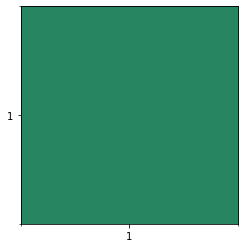

In [373]:
plot_img(F_map)